In [1]:
!nvidia-smi

Mon Oct 12 10:16:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 53kB/s 


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/parent/train'
valid_path = '/content/drive/My Drive/parent/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/parent/train/*')


In [10]:
folders

['/content/drive/My Drive/parent/train/son',
 '/content/drive/My Drive/parent/train/kante',
 '/content/drive/My Drive/parent/train/vardy']

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/parent/train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 45 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/parent/test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 15 images belonging to 3 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
1/1 [==============================] - 0s 190ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 4.3621 - val_accuracy: 0.5333
Epoch 2/5
1/1 [==============================] - 0s 119ms/step - loss: 2.9251e-04 - accuracy: 1.0000 - val_loss: 4.0918 - val_accuracy: 0.5333
Epoch 3/5
1/1 [==============================] - 0s 115ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.8541 - val_accuracy: 0.5333
Epoch 4/5
1/1 [==============================] - 0s 121ms/step - loss: 2.5901e-04 - accuracy: 1.0000 - val_loss: 3.6587 - val_accuracy: 0.6000
Epoch 5/5
1/1 [==============================] - 0s 105ms/step - loss: 1.3961e-06 - accuracy: 1.0000 - val_loss: 3.5053 - val_accuracy: 0.5333


In [29]:
import matplotlib.pyplot as plt

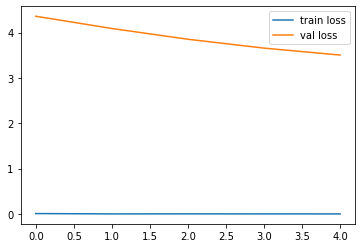

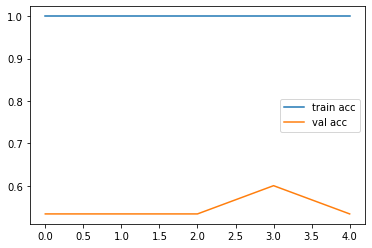

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
y_pred = model.predict(test_set)

In [32]:
y_pred

array([[3.1412588e-03, 9.9402669e-06, 9.9684876e-01],
       [2.4775392e-07, 1.7494664e-02, 9.8250508e-01],
       [1.6549009e-01, 8.3450991e-01, 2.1328292e-08],
       [1.9970838e-02, 1.2613578e-01, 8.5389340e-01],
       [3.0956027e-05, 1.0867613e-07, 9.9996889e-01],
       [1.5796737e-11, 1.0000000e+00, 7.3724666e-09],
       [7.0586291e-14, 7.9270024e-10, 1.0000000e+00],
       [5.8453250e-01, 5.2085664e-04, 4.1494665e-01],
       [1.9931700e-05, 7.5647199e-01, 2.4350807e-01],
       [2.1288636e-01, 7.8519338e-01, 1.9202925e-03],
       [8.6093314e-07, 8.3467377e-08, 9.9999905e-01],
       [7.8914059e-07, 1.3229677e-12, 9.9999917e-01],
       [2.2130425e-01, 4.4915962e-04, 7.7824658e-01],
       [1.8374921e-16, 1.0000000e+00, 4.0865970e-08],
       [1.3340065e-08, 1.0000000e+00, 5.4003073e-09]], dtype=float32)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1])